In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers 
from sklearn.metrics import precision_score, recall_score, f1_score

2025-04-17 04:53:35.128714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Spatial

### Random Forest

In [22]:
# Upload dataset
upwelling_spatial = pd.read_csv('upwelling_spatial.csv')

# Clean dataset
df_cleaned = upwelling_spatial.dropna(axis = 0) 
df_cleaned = upwelling_spatial.drop(columns = ['date (string)'])
df = df_cleaned.drop(columns=['upwelling3day','upwelling1day'], axis = 1) # both need to be dropped to avoid overestimation 

In [40]:
# Define target and variables for training and test values for the data and target
target = df_cleaned['upwelling3day'] # change this when checking predicting based on +1 or +3 day parameter

# Define variables for training and test values for the data and target
data_train, data_test, target_train, target_test = train_test_split(df, target, test_size = 0.20, random_state = 0, shuffle = True)

In [42]:
# Run the random forest
clf = RandomForestClassifier(n_estimators = 464, random_state = 25)
clf.fit(data_train, target_train)

RandomForestClassifier(n_estimators=464, random_state=25)

In [43]:
# Print features and importances from random forest
FI = clf.feature_importances_
FI_df = pd.DataFrame({'feature': df.columns, 'importance': FI})
importance_ranked = FI_df.sort_values(by = 'importance', ascending = False)
print(importance_ranked)

           feature  importance
5           wind_v    0.153182
8         sst_diff    0.148938
0     date (float)    0.137228
4           wind_u    0.122839
7       wind_speed    0.111798
6              sst    0.098140
3  ekman_upwelling    0.067258
9     sst_decrease    0.066011
1         latitude    0.054250
2        longitude    0.040358


In [44]:
# What's the model's accuracy? 
target_pred = clf.predict(data_test)
print('RF Model Accuracy (Spatial): ', metrics.accuracy_score(target_test, target_pred))

RF Model Accuracy (Spatial):  0.9578052995391705


### Neural Network

In [45]:
# Define variables and normalize data
Y = df_cleaned['upwelling3day'] # change this when checking predicting based on +1 or +3 day parameter
X = df_cleaned.drop(columns = ['upwelling1day','upwelling3day']) 
X_norm = (X - X.mean()) / (X.std())

In [46]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.2, random_state=1)

In [47]:
# Create the neural network
model = keras.Sequential(
    [
        layers.Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),        
        layers.Dense(50, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(1, activation = 'sigmoid'),
    ]
)

model.compile(
    loss = keras.losses.binary_crossentropy, 
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    metrics =['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()],
)

# Train the model
model.fit(x_train, y_train, epochs = 10, verbose = 2)

# Generate predictions
y_pred = model.predict(x_test)

# Convert probabilities to 0s or 1s
y_pred_binary1 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_pred)
]

Epoch 1/10
3472/3472 - 7s - 2ms/step - accuracy: 0.9168 - false_negatives_2: 9204.0000 - false_positives_2: 43.0000 - loss: nan
Epoch 2/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 3/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 4/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 5/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 6/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 7/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000 - false_positives_2: 0.0000e+00 - loss: nan
Epoch 8/10
3472/3472 - 6s - 2ms/step - accuracy: 0.9171 - false_negatives_2: 9209.0000

# Non-Spatial

### Random Forest

In [2]:
# Upload dataset
upwelling = pd.read_csv('upwelling_nonspatial.csv')

# Clean dataset
df_cleaned1 = upwelling.dropna()
df_cleaned1 = df_cleaned1.drop(columns = ['date (string)'])
df1 = df_cleaned1.drop(columns=['upwelling1day','upwelling3day'], axis = 1)

In [3]:
# Define target and variables for training and test values for the data and target
target1 = df_cleaned1['upwelling3day'] # change this when checking predicting based on +1 or +3 day parameter

data_train1, data_test1, target_train1, target_test1 = train_test_split(df1, target1, test_size = 0.20, random_state = 0, shuffle = True)

In [4]:
# Run the random forest
clf1 = RandomForestClassifier(n_estimators = 464, random_state = 20)
clf1.fit(data_train1, target_train1)

RandomForestClassifier(n_estimators=464, random_state=20)

In [5]:
# Print features and importances from random forest
FI1 = clf1.feature_importances_
FI_df1 = pd.DataFrame({'feature': df1.columns, 'importance': FI1})
importance_ranked1 = FI_df1.sort_values(by = 'importance', ascending = False)
print(importance_ranked1)

           feature  importance
5           wind_v    0.188404
4           wind_u    0.151795
8         sst_diff    0.147935
7       wind_speed    0.132321
0     date (float)    0.117895
6              sst    0.104094
3  ekman_upwelling    0.082948
9     sst_decrease    0.074608
1         latitude    0.000000
2        longitude    0.000000


In [6]:
# What's the model's accuracy?
target_pred1 = clf1.predict(data_test1)
print('RF Model Accuracy (Spatial): ', metrics.accuracy_score(target_test1, target_pred1))

RF Model Accuracy (Spatial):  0.8866396761133604


### Neural Network

In [8]:
# Define variables and normalize data
Y1 = df_cleaned1['upwelling3day'] # change this when checking predicting based on +1 or +3 day parameter
X1 = df_cleaned1.drop(columns = ['upwelling1day','upwelling3day'])
X_norm1 = (X1 - X1.mean()) / (X1.std())

In [9]:
# Split data into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_norm1, Y1, test_size = 0.2, random_state=1)

In [10]:
# Create the neural network
model1 = keras.Sequential(
    [
        layers.Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),        
        layers.Dense(100, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Dense(1, activation = 'sigmoid'), 
    ]
)

model1.compile(
    loss = keras.losses.binary_crossentropy, 
    optimizer = keras.optimizers.Adam(learning_rate = 0.01), 
    metrics =['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()],
)

# Train the model
model1.fit(x_train1, y_train1, epochs = 10, verbose = 2)

# Generate predictions
y_pred1 = model1.predict(x_test1)

# Convert probabilities to 0s or 1s
y_pred_binary2 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_pred1)
]

Epoch 1/10
31/31 - 2s - 70ms/step - accuracy: 0.7923 - false_negatives: 48.0000 - false_positives: 157.0000 - loss: 2.2930
Epoch 2/10
31/31 - 0s - 4ms/step - accuracy: 0.8774 - false_negatives: 72.0000 - false_positives: 49.0000 - loss: 0.6987
Epoch 3/10
31/31 - 0s - 3ms/step - accuracy: 0.8764 - false_negatives: 76.0000 - false_positives: 46.0000 - loss: 0.4665
Epoch 4/10
31/31 - 0s - 3ms/step - accuracy: 0.8663 - false_negatives: 83.0000 - false_positives: 49.0000 - loss: 0.4584
Epoch 5/10
31/31 - 0s - 4ms/step - accuracy: 0.8683 - false_negatives: 82.0000 - false_positives: 48.0000 - loss: 0.4255
Epoch 6/10
31/31 - 0s - 4ms/step - accuracy: 0.8612 - false_negatives: 83.0000 - false_positives: 54.0000 - loss: 0.4217
Epoch 7/10
31/31 - 0s - 4ms/step - accuracy: 0.8794 - false_negatives: 83.0000 - false_positives: 36.0000 - loss: 0.4011
Epoch 8/10
31/31 - 0s - 4ms/step - accuracy: 0.8744 - false_negatives: 87.0000 - false_positives: 37.0000 - loss: 0.4081
Epoch 9/10
31/31 - 0s - 4ms/st

# Summary

           feature  importance
5           wind_v    0.153182
8         sst_diff    0.148938
0     date (float)    0.137228
4           wind_u    0.122839
7       wind_speed    0.111798
6              sst    0.098140
3  ekman_upwelling    0.067258
9     sst_decrease    0.066011
1         latitude    0.054250
2        longitude    0.040358
RF Model Accuracy (Spatial):  0.9578052995391705


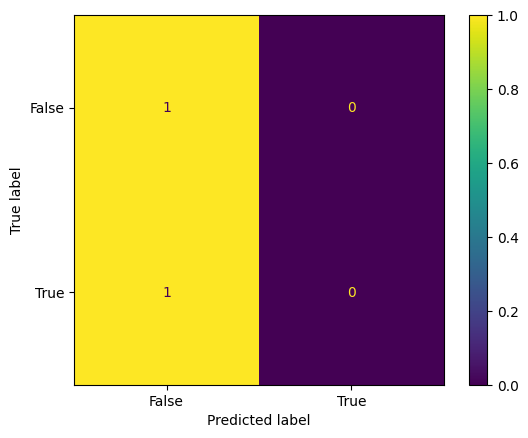

868/868 - 1s - 1ms/step - accuracy: 0.9171 - false_negatives_2: 2304.0000 - false_positives_2: 0.0000e+00 - loss: nan
Neural Network Test Accuracy (Spatial): 0.9171


In [50]:
# Spatial Results

# RF Results
FI = clf.feature_importances_
FI_df = pd.DataFrame({'feature': df.columns, 'importance': FI})
importance_ranked = FI_df.sort_values(by = 'importance', ascending = False)
print(importance_ranked)

target_pred = clf.predict(data_test)
print('RF Model Accuracy (Spatial): ', metrics.accuracy_score(target_test, target_pred))

# NN Results
## plot confusion matrix
confusion_matrix1 = sklearn.metrics.confusion_matrix(y_test, y_pred_binary1, normalize = 'true') # normalized to show proportions

cm_display1 = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display1.plot()
plt.show()

results2 = model.evaluate(x_test, y_test, verbose=2)
print(f"Neural Network Test Accuracy (Spatial): {results2[1]:.4f}")

           feature  importance
5           wind_v    0.188404
4           wind_u    0.151795
8         sst_diff    0.147935
7       wind_speed    0.132321
0     date (float)    0.117895
6              sst    0.104094
3  ekman_upwelling    0.082948
9     sst_decrease    0.074608
1         latitude    0.000000
2        longitude    0.000000
RF Model Accuracy (Non-Spatial):  0.8866396761133604


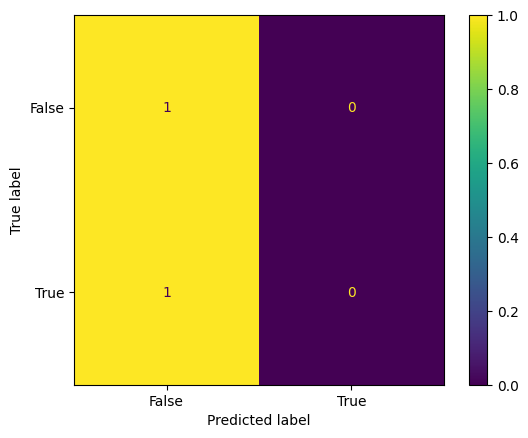

8/8 - 0s - 42ms/step - accuracy: 0.8583 - false_negatives: 35.0000 - false_positives: 0.0000e+00 - loss: 0.5803
Neural Network Test Accuracy (Non-Spatial): 0.8583


In [20]:
# Non-Spatial Results

# RF results
FI1 = clf1.feature_importances_
FI_df1 = pd.DataFrame({'feature': df1.columns, 'importance': FI1})
importance_ranked1 = FI_df1.sort_values(by = 'importance', ascending = False)
print(importance_ranked1)

target_pred1 = clf1.predict(data_test1)
print('RF Model Accuracy (Non-Spatial): ', metrics.accuracy_score(target_test1, target_pred1))

## NN results
# plot confusion matrix
confusion_matrix2 = sklearn.metrics.confusion_matrix(y_test1, y_pred_binary2, normalize = 'true') # normalize can be pred, true, all, or none

cm_display2 = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
cm_display2.plot()
plt.show()

results3 = model1.evaluate(x_test1, y_test1, verbose=2)
print(f"Neural Network Test Accuracy (Non-Spatial): {results3[1]:.4f}")